# Time series explorer

In [1]:
dataset_dir_name = 'listgeometry'
%run 'lib/Lib time series preparation.ipynb'

In [2]:
file_page_names = "%s/pagenames" % dataset_dir_name
list_of_page_names = [x.strip() for x in codecs.open(file_page_names,"r","utf-8").readlines()]
print 'Number of pages in file:',len(list_of_page_names)
gather_and_compute_data(dataset_dir_name,list_of_page_names)


Number of pages in file: 299


No revisions ts found for bot for page Acute and obtuse triangles
No revisions ts found for ip for page Coordinate-free
No revisions ts found for ip for page List of triangle inequalities
No revisions ts found for bot for page Napkin ring problem


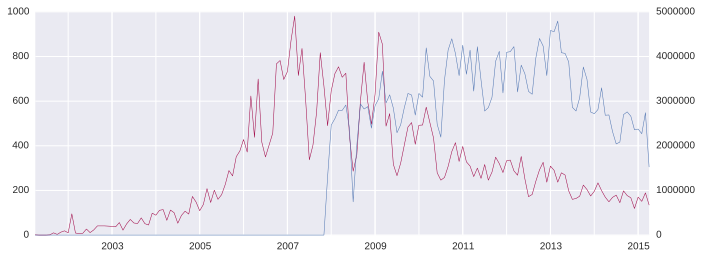

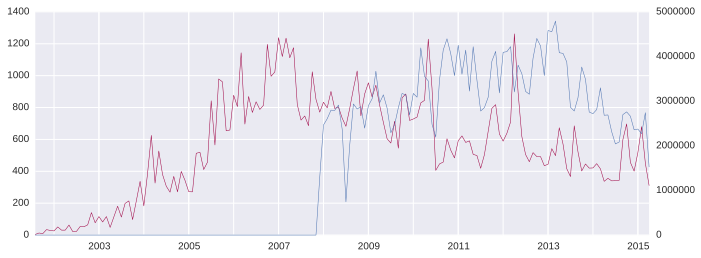

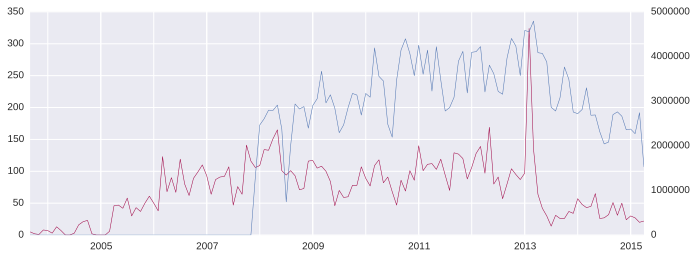

In [3]:
get_monthly_report_set_of_pages(dataset_dir_name,list_of_page_names)

In [4]:
#for title in pages_data.keys():\n",
#    display(HTML(\"<h2>%s</h2>\" % (title)))\n",
#     df = pages_views_weekly_ts[title].join(revisions_ip_weekly_ts[title]).fillna(0)\n",
#    df = df.join(revisions_bot_weekly_ts[title],how='outer').fillna(0)\n",
#    df = df.join(revisions_members_weekly_ts[title],how='outer').fillna(0)\n",
#    df['page_views'].plot(figsize=(16,4), linewidth=\"0.5\", ylim=0, colormap=\"Spectral\", rot=0)\n",
#    df['revisions_ip'].plot(secondary_y=True, style=\"-\", linewidth=\"0.5\", ylim=0,sharex=True)  \n",
# plt.show()

In [5]:
df = stat_computation(dataset_dir_name,list_of_page_names)
df.head(10)


,Page_id,Length,Namespace,Nb_revisions,Nb_revisions_IP,Nb_revisions_Bot,Nb_revisions_wiki,Nb_editors,Nb_editors_IP,Nb_editors_Bot,Nb_editors_wiki,Links,Date,Page_views_2010,Quality,Is_list
Digital geometry,386413,7211,0,116,51,11,54,63,16,7,40,46,1052,9363,2,0
Synthetic geometry,267484,11870,0,129,14,11,104,60,11,5,44,98,910,13448,0,0
Triangle inequality,53941,25011,0,395,122,28,245,199,88,12,99,87,498,136990,4,0
Deltahedron,493995,13811,0,197,18,19,160,69,13,5,51,70,1139,8807,2,0
Isoperimetric inequality,326182,19249,0,176,28,27,121,94,21,12,61,105,982,17791,2,0
Matrix representation of conic sections,189243,7787,0,110,31,9,70,62,16,3,43,31,773,8474,3,0
Orthodiagonal quadrilateral,30425383,12496,0,71,3,5,63,16,3,3,10,57,3648,0,2,0
Invariant (mathematics),1126638,11436,0,147,25,18,104,77,20,8,49,127,1387,53719,3,0
Information geometry,487312,31534,0,205,35,7,163,78,26,4,48,95,1136,20200,3,0
Zonohedron,669402,14056,0,126,9,9,108,48,7,4,37,91,1222,11582,4,0


In [6]:
df.drop('Namespace',axis=1,inplace=True)

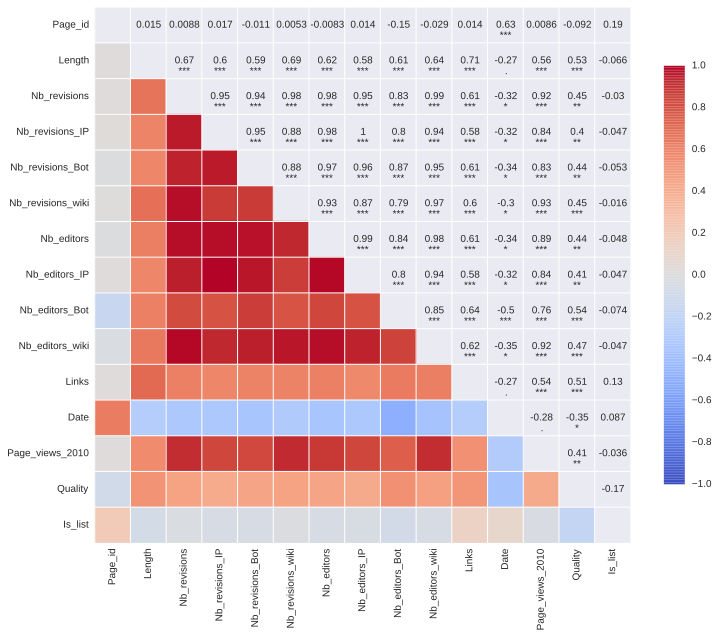

In [7]:
f, ax = plt.subplots(figsize=(12, 10))
sns.corrplot(df,diag_names=False)

Rank,Pagename,Page views,Rank,Pagename,Page views
1,N-sphere,81709.0,2,Binary space partitioning,76422.0
3,Reuleaux triangle,64990.0,4,Point in polygon,56049.0
5,Parametric surface,44364.0,6,Cyclic quadrilateral,40322.0
7,Root system,37456.0,8,Relative direction,31514.0
9,List of interactive geometry software,31411.0,10,Incircle and excircles of a triangle,29416.0
11,Graham scan,29091.0,12,Polygon triangulation,26823.0
13,Cavalieri's principle,24940.0,14,Glide reflection,21920.0
15,List of circle topics,20856.0,16,List of triangle topics,20208.0
17,Homothetic transformation,19886.0,18,Curve of constant width,18721.0
19,Geometric shape,18024.0,20,Roman surface,15276.0


No revisions ts found for bot for page Napkin ring problem
No revisions ts found for ip for page List of triangle inequalities
No revisions ts found for bot for page Acute and obtuse triangles


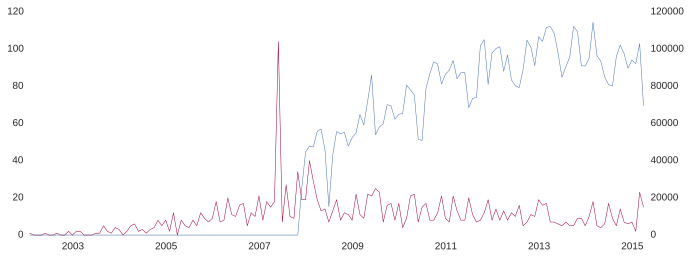

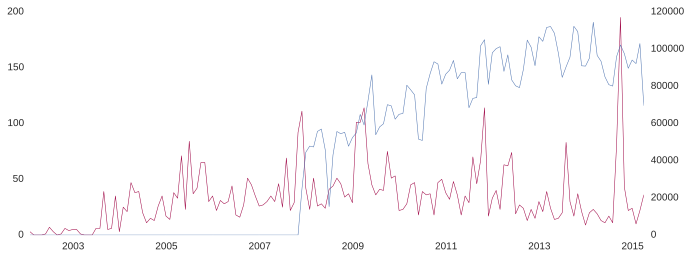

Rank,Pagename,Page views,Rank,Pagename,Page views
1,2D geometric model,26021.0,2,Parabolic microphone,20794.0
3,Internal and external angle,19496.0,4,Concurrent lines,18849.0
5,Prismatoid,11339.0,6,Distance geometry,10885.0
7,Infinitesimal transformation,10225.0,8,Hidden line removal,8993.0
9,Hermite spline,6290.0,10,Dissection problem,3618.0
11,Arc (projective geometry),3353.0,12,Poncelet–Steiner theorem,3317.0
13,Prototile,2575.0,14,Heronian tetrahedron,2439.0
15,Angular defect,1.0,16,Wallace–Bolyai–Gerwien theorem,0.0


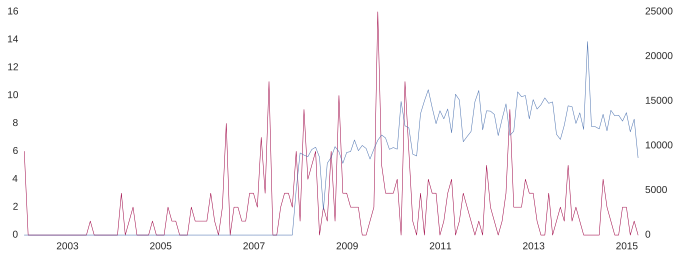

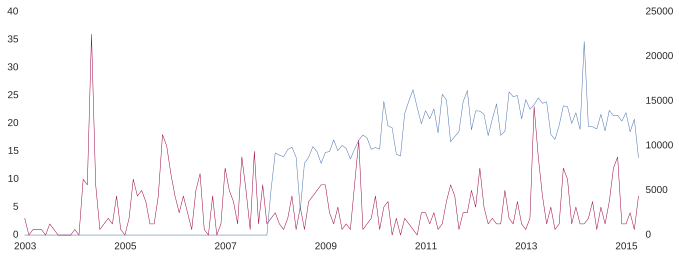

Rank,Pagename,Page views,Rank,Pagename,Page views
1,Semi-major axis,315478.0,2,Spline (mathematics),248410.0
3,Pattern,220643.0,4,Euclidean distance,199296.0
5,Heron's formula,185700.0,6,Affine transformation,183484.0
7,Parametric equation,178242.0,8,Pyramid (geometry),167436.0
9,3D projection,166973.0,10,Prism (geometry),155332.0
11,Parabolic reflector,118699.0,12,Mirror image,113353.0
13,Cone,108078.0,14,Isosceles trapezoid,105075.0
15,Space group,103691.0,16,Cross section (geometry),103334.0
17,Dihedral angle,99769.0,18,Eccentricity (mathematics),98262.0
19,Spheroid,98149.0,20,Parallelepiped,97960.0


No revisions ts found for ip for page Coordinate-free


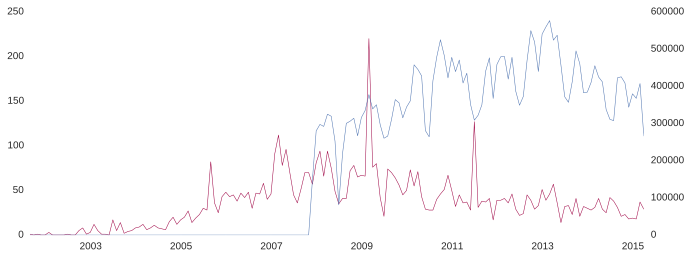

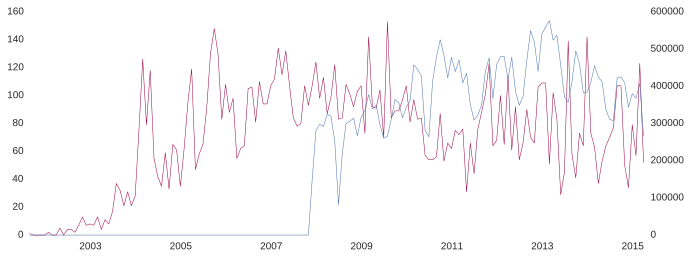

Rank,Pagename,Page views,Rank,Pagename,Page views
1,Trigonometry,1213387.0,2,Ellipse,970215.0
3,Geometry,835121.0,4,Parabola,723165.0
5,Trapezoid,701083.0,6,Rhombus,676344.0
7,Crystal,657544.0,8,Tessellation,561654.0
9,Symmetry,529476.0,10,Quadrilateral,476432.0
11,Rectangle,331846.0,12,Congruence (geometry),326144.0
13,Ellipsoid,299809.0,14,Conic section,254533.0
15,Shape,235793.0,16,Equilateral triangle,185729.0
17,Voronoi diagram,174750.0,18,Handedness,173619.0
19,Spherical trigonometry,173008.0,20,Parallel (geometry),134918.0


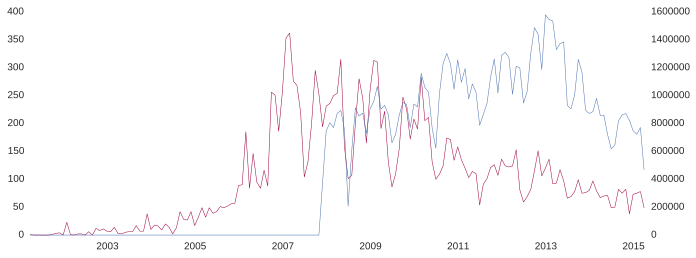

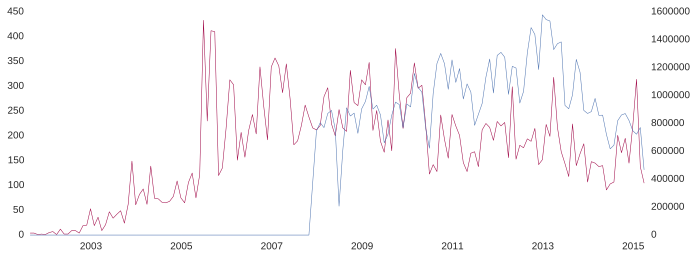

Rank,Pagename,Page views,Rank,Pagename,Page views
1,Mathematics,2413245.0,2,Sphere,1822475.0
3,Triangle,1456473.0,4,Fractal,1170156.0
5,Circle,1054817.0,6,Polygon,956035.0
7,Angle,686547.0,8,Topology,606216.0
9,Computer graphics,589564.0,10,3D computer graphics,541872.0
11,Tetrahedron,528876.0,12,Euclidean geometry,389520.0
13,Hyperbola,349228.0,14,Polyhedron,342956.0
15,Torus,317136.0,16,Platonic solid,291263.0
17,Bézier curve,276940.0,18,Line (geometry),266585.0
19,Pythagorean triple,235335.0,20,Non-Euclidean geometry,228582.0


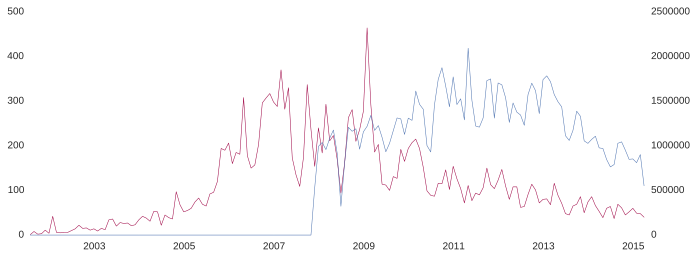

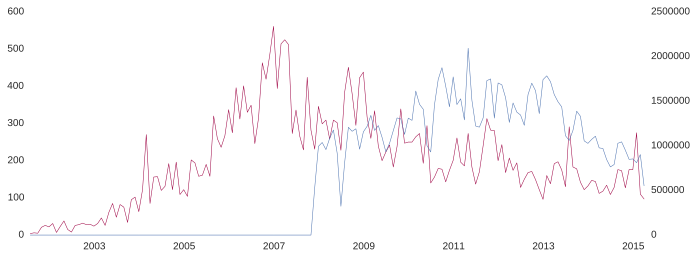

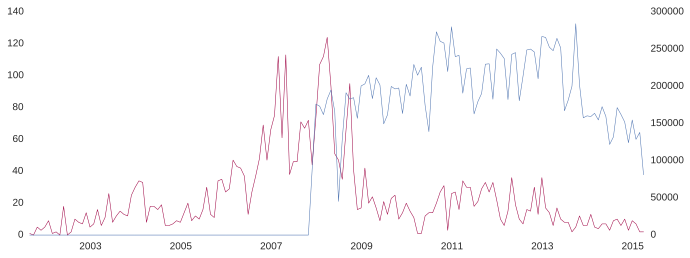

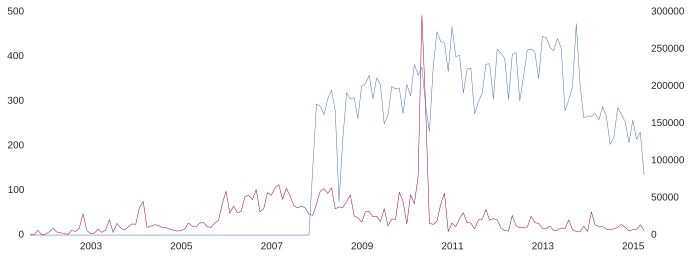

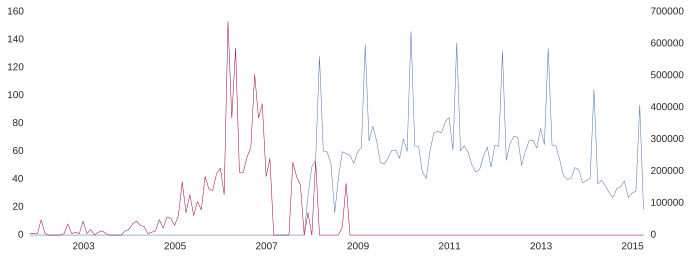

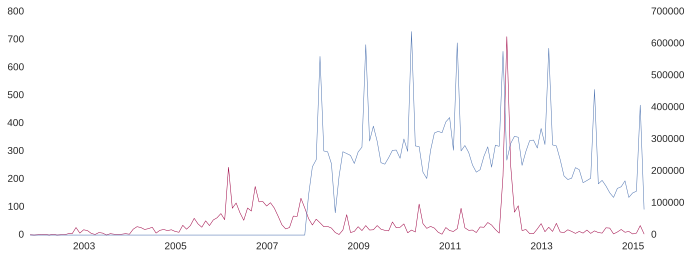

In [16]:
%run 'lib/Lib time series preparation.ipynb'

df_sort_pageviews = df.sort_index(axis=0,by=['Quality','Page_views_2010'],ascending=[False,False])
#ranking = res.index



def index_list(i_list):
    html = '<table><tr><th>Rank</th><th>Pagename</th><th>Page views</th><th>Rank</th><th>Pagename</th><th>Page views</th></tr>'
    for i in range(0,int((len(i_list)+1)/2)):
        html+='<tr><td>%s</td><td>%s</td><td>%s</td>' % (2*i+1,i_list[2*i],df_sort_pageviews['Page_views_2010'][i_list[2*i]])
        if 2*i+1<len(i_list):
            html+='<td>%s</td><td>%s</td><td>%s</td>' % (2*i+2,i_list[2*i+1],df_sort_pageviews['Page_views_2010'][i_list[2*i+1]])

        html += '</tr>'
    html+='</table>'
    return html
    
for i in range(0,8):
    select = df_sort_pageviews[df_sort_pageviews['Quality']==i].index
    if len(select)>0:
        display(HTML('<h2>Report for page of quality %s.</h2>' % i))
        display(HTML('The revisions is the red curve and the pageviews the blue curve.'))
        display(HTML(index_list(select)))
        get_monthly_report_set_of_pages(dataset_dir_name,select,bot=False)

#chunk_size = int(len(ranking)/5)
#for i in range(0,len(ranking)/chunk_size):
#    display(HTML('<h2>Report for page %s to %s.</h2>' %(i*chunk_size,min(len(ranking),chunk_size*(i+1)))))
#    chunk = (ranking[i*chunk_size:min(len(ranking),chunk_size*(i+1))])
#    display(HTML(index_list(chunk)))
#    get_yearly_report_set_of_pages(dataset_dir_name,chunk,bot=False)